# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

### Описание данных

- `id` — уникальный идентификатор скважины;
	
- `f0`, `f1`, `f2` — три признака точек (неважно, что они означают, но сами признаки значимы);
product — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats as st
import warnings
from sklearn.metrics import mean_squared_error
from sklearn import metrics
warnings.simplefilter('ignore')

In [60]:
df_1 = pd.read_csv('/datasets/geo_data_0.csv')
df_2 = pd.read_csv('/datasets/geo_data_1.csv')
df_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [61]:
print('ДАТАСЕТ 1')
print(' ')
display(df_1.info())
display(df_1.head())
print(' ')
print('ДАТАСЕТ 2')
print(' ')
display(df_2.info())
display(df_2.head())
print(' ')
print('ДАТАСЕТ 3')
print(' ')
display(df_3.info())
display(df_3.head())

ДАТАСЕТ 1
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


 
ДАТАСЕТ 2
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


 
ДАТАСЕТ 3
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [62]:
#сохраним признаки в переменных:
df_1_X = df_1.drop(['product', 'id'], axis=1)
df_1_y = df_1['product']

df_2_X = df_2.drop(['product', 'id'], axis=1)
df_2_y = df_2['product']

df_3_X = df_3.drop(['product', 'id'], axis=1)
df_3_y = df_3['product']

- Пропусков нет, предобработка не требуется. Данные столбца `id` не понадобятся при построении модели, они не несут для нас никакой ценности. 
- Записали целевой признак (в столбцах `product`) и признаки(`f0` `f1` `f2`) в переменные.

## Обучение и проверка модели

In [63]:
#разделим данные на обучающую и валидационную выборки в соотношении 75:25:
df_1_X_train, df_1_X_valid, df_1_y_train, df_1_y_valid = train_test_split(df_1_X, df_1_y, train_size=0.75, random_state=47)

df_2_X_train, df_2_X_valid, df_2_y_train, df_2_y_valid = train_test_split(df_2_X, df_2_y, train_size=0.75, random_state=47)

df_3_X_train, df_3_X_valid, df_3_y_train, df_3_y_valid = train_test_split(df_3_X, df_3_y, train_size=0.75, random_state=47)

In [64]:
#напишем функцию для обучения и подсчета среднего запаса сырья и RMSE (корня средней квадратичной ошибки):
def learn(X_train, y_train, X_valid, y_valid, y):
    model = LinearRegression()
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    rmse = (mean_squared_error(y_valid, predictions))**0.5
    print('Средний запас предсказанного сырья', predictions.mean())
    print('Средний фактический запас', y.mean())
    print('RMSE', rmse)
    return predictions

**Регион 1** 

In [65]:
df_1_pred = learn(df_1_X_train, df_1_y_train, df_1_X_valid, df_1_y_valid, df_1_y)

Средний запас предсказанного сырья 92.360864667356
Средний фактический запас 92.50000000000001
RMSE 37.52379045981726


**Регион 2**

In [66]:
df_2_pred = learn(df_2_X_train, df_2_y_train, df_2_X_valid, df_2_y_valid, df_2_y)

Средний запас предсказанного сырья 68.81389806475144
Средний фактический запас 68.82500000000002
RMSE 0.8887286598305351


**Регион 3**

In [67]:
df_3_pred = learn(df_3_X_train, df_3_y_train, df_3_X_valid, df_3_y_valid, df_3_y)

Средний запас предсказанного сырья 95.09129230128178
Средний фактический запас 95.00000000000004
RMSE 39.988392017930316


Видим, что 1й и 3й регионы имеют больший запас сырья (более 90 тыс. баррелей), чем 2й регион (ок 68 тыс.).
У них больше и значение RMSE. Это связано с разичием в распределении целевого признака.

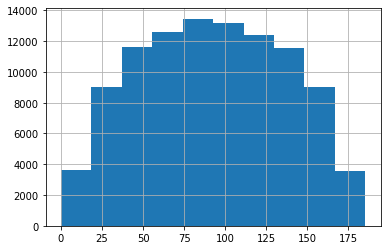

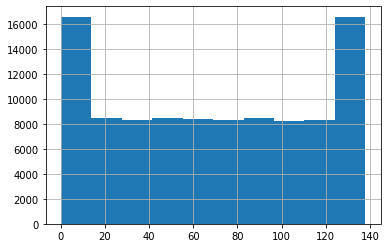

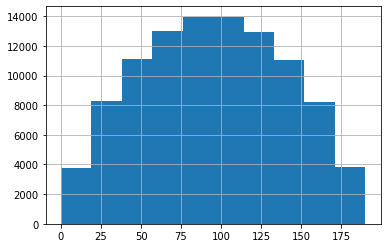

In [68]:
df_all = [df_1_y, df_2_y, df_3_y]
for i in df_all:
    ax = i.hist()
    plt.show()

## Подготовка к расчёту прибыли

In [69]:
#все ключевые значения для расчётов сохраним в отдельных переменных:
RESEARCH_POINTS = 500
BEST_POINTS = 200
BUDGET = 10000000000
REVENUE_POINT = 450000
LOSS_THRESHOLD = .025

In [70]:
#достаточный объём сырья для безубыточной разработки новой скважины:
sufficient = round(BUDGET / BEST_POINTS / REVENUE_POINT, 2)
print('Достаточный объем сырья для безубыточной разработки новой скважины:', sufficient, 'тыс. баррелей')

Достаточный объем сырья для безубыточной разработки новой скважины: 111.11 тыс. баррелей


In [71]:
table = pd.DataFrame({'Регион 1': [df_1_y.mean()],
        'Регион 2': [df_2_y.mean()],
        'Регион 3': [df_3_y.mean()],
        'sufficient': [sufficient]},
         index = ['mean volume'])
table

,Регион 1,Регион 2,Регион 3,sufficient
mean volume,92.5,68.825,95.0,111.11


Как видно, средние значения по регионам не дотягивают до безубыточного объема добываемого сырья. Поэтому и необходимо выбрать лучшие 200 точек. 

In [72]:
#напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
def profit(target, predictions):
    target = pd.Series(target).reset_index(drop=True)
    predictions = pd.Series(predictions).reset_index(drop=True)
    predictions_200 = predictions.sort_values(ascending=False)[:BEST_POINTS].index
    selected = target[predictions_200]
    profit = selected.sum() * REVENUE_POINT - BUDGET
    return profit

In [73]:
table_profit = pd.DataFrame({'Регион 1': [round(profit(df_1_y_valid, df_1_pred))],
        'Регион 2': [round(profit(df_2_y_valid, df_2_pred))],
        'Регион 3': [round(profit(df_3_y_valid, df_3_pred))],},
         index = ['Выручка, руб.'])
table_profit

,Регион 1,Регион 2,Регион 3
"Выручка, руб.",3382818901,2415086697,2648943682


Самый прибыльный регион - первый, он приносит более 3 млрд. рублей прибыли.

## Расчет рисков и прибыли. 

Посчитаем риски и прибыль, применив технику Bootstrap с 1000 выборок.

In [74]:
def bootstrap (target, prediction):
    state = np.random.RandomState(47)
    values = []
    for i in range(1000):
        target_subsample = target.reset_index(drop=True).sample(n=500, replace=True, random_state=state)
        prediction_subsample = prediction[target_subsample.index]
        values.append(profit(target_subsample, prediction_subsample))
    
    values = pd.Series(values)
    lower = (values.quantile(.025) / 1e6).round(2)
    upper = (values.quantile(.975) / 1e6).round(2)
    mean = values.mean()

    print('Средняя прибыль:', mean)
    print('2.5%-квантиль:', lower)
    print('Доверительный интервал: от',  lower, 'до', upper)
    print('Риски убытка:', round((values < 0).mean()*100, 2), '%')

In [75]:
print('Регион 1')
bootstrap(df_1_y_valid, df_1_pred)

Регион 1
Средняя прибыль: 458462879.90615195
2.5%-квантиль: -73.5
Доверительный интервал: от -73.5 до 940.97
Риски убытка: 4.4 %


In [76]:
print('Регион 2')
bootstrap(df_2_y_valid, df_2_pred)

Регион 2
Средняя прибыль: 454748239.2654893
2.5%-квантиль: 53.09
Доверительный интервал: от 53.09 до 855.91
Риски убытка: 1.4 %


In [77]:
print('Регион 3')
bootstrap(df_3_y_valid, df_3_pred)

Регион 3
Средняя прибыль: 380334420.3705588
2.5%-квантиль: -176.15
Доверительный интервал: от -176.15 до 890.55
Риски убытка: 8.2 %


In [80]:
table_profit = pd.DataFrame({'Средняя прибыль, руб.': ['458462879', '454748239', '380334420'],
        'Риск убытков': ['4.4%', '1.4%', '8.2%']},
         index = ['Регион 1', 'Регион 2', 'Регион 3'])
table_profit

,"Средняя прибыль, руб.",Риск убытков
Регион 1,458462879,4.4%
Регион 2,454748239,1.4%
Регион 3,380334420,8.2%


После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. В нашем случае модель определяет Регион 2 как лучший для разработки. Хоть и средняя выручка в первом регионе больше, но риск убытков в регионе №2 меньше на 3% и доверительный интервал более узкий и не включает минимальные отрицательные значения, как в других регионах. 